In [35]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Import Dataset


In [2]:
df = pd.read_csv('ObesityDataSet.csv', encoding='latin-1')

### 2 Exploration Dataset

In [3]:
# Preview of the dataset
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


##### Indice de masse corporelle= Weight/(Height*Height)


    • Insuffisance pondérale inférieure à 18,5

    • Normal 18,5 à 24,9

    • Surpoids 25,0 à 29,9

    • Obésité I 30,0 à 34,9

    • Obésité II 35,0 à 39,9

    • Obésité III supérieure à 40

In [30]:
# Add IMC column
df['IMC'] = df['Weight']/(df['Height']*df['Height'])

In [6]:
# Shape of the dataset 
df.shape

(2111, 18)

In [7]:
# Columns of the dataset 
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'IMC'],
      dtype='object')

In [8]:
# Types of the features
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
IMC                               float64
dtype: object

In [9]:
# Number of NA per columns
df.isna().sum().sort_values(ascending=True)

Gender                            0
MTRANS                            0
CALC                              0
TUE                               0
FAF                               0
SCC                               0
CH2O                              0
SMOKE                             0
CAEC                              0
NCP                               0
FCVC                              0
FAVC                              0
family_history_with_overweight    0
Weight                            0
Height                            0
Age                               0
NObeyesdad                        0
IMC                               0
dtype: int64

#####  We can see that we don't have NA values

Our dataset is therefore already cleaned up because neither column of the two datasets contains undetermined values.

### 3. Data Visualization 

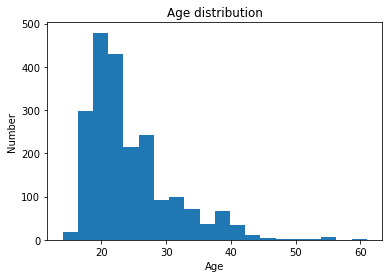

In [10]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(df['Age'],bins = 20) 
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Number')
plt.show()

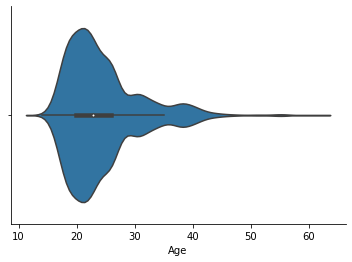

In [11]:
sns.violinplot(df['Age']) #Variable Plot
sns.despine()

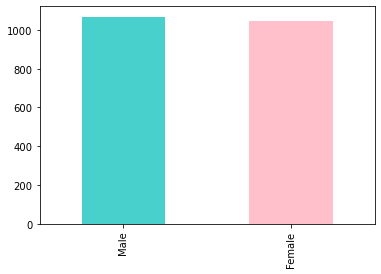

In [12]:
df["Gender"].value_counts().plot(kind='bar', color=['mediumturquoise','pink'])

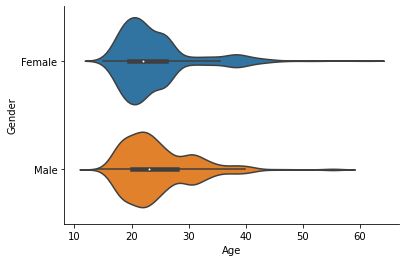

In [13]:
sns.violinplot(df['Age'], df['Gender']) #Variable Plot
sns.despine()


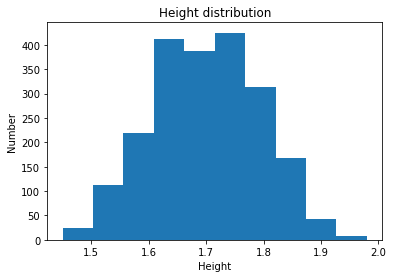

In [14]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(df['Height'],bins = 10) 
plt.title('Height distribution')
plt.xlabel('Height')
plt.ylabel('Number')
plt.show()

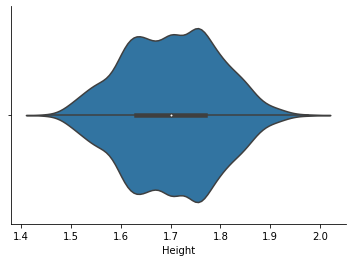

In [15]:
sns.violinplot(df['Height']) #Variable Plot
sns.despine()

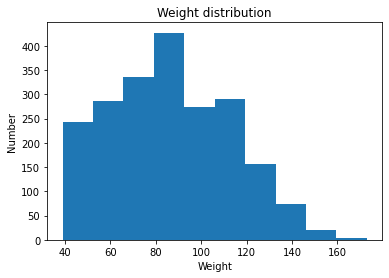

In [16]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(df['Weight'],bins = 10) 
plt.title('Weight distribution')
plt.xlabel('Weight')
plt.ylabel('Number')
plt.show()

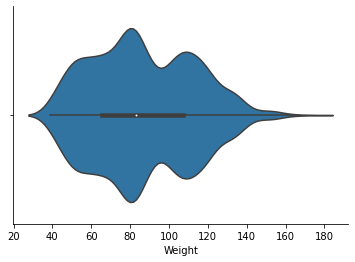

In [17]:
sns.violinplot(df['Weight']) #Variable Plot
sns.despine()

count    2111.000000
mean       86.586058
std        26.191172
min        39.000000
25%        65.473343
50%        83.000000
75%       107.430682
max       173.000000
Name: Weight, dtype: float64


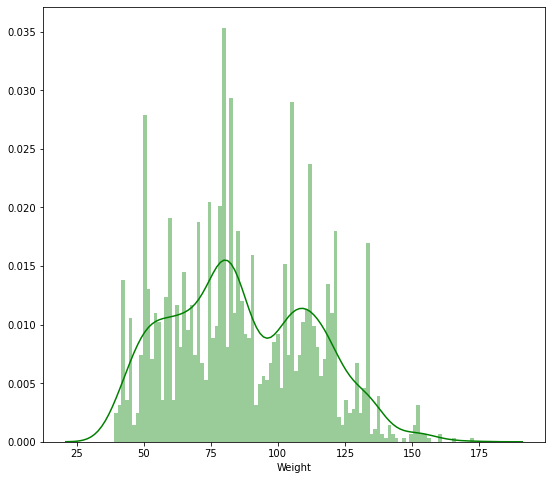

In [18]:
print(df['Weight'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['Weight'], color='g', bins=100, hist_kws={'alpha': 0.4});

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

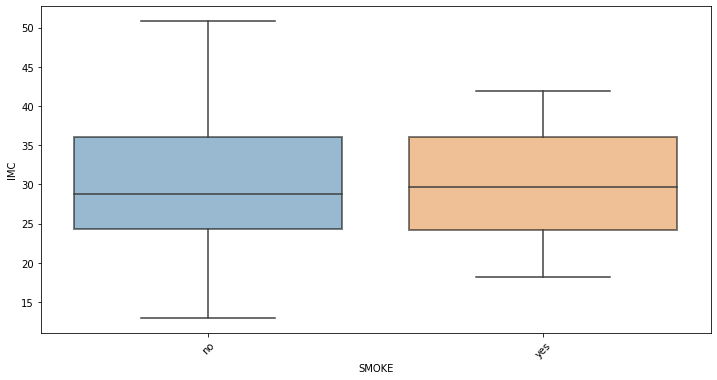

In [19]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='SMOKE', y='IMC', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

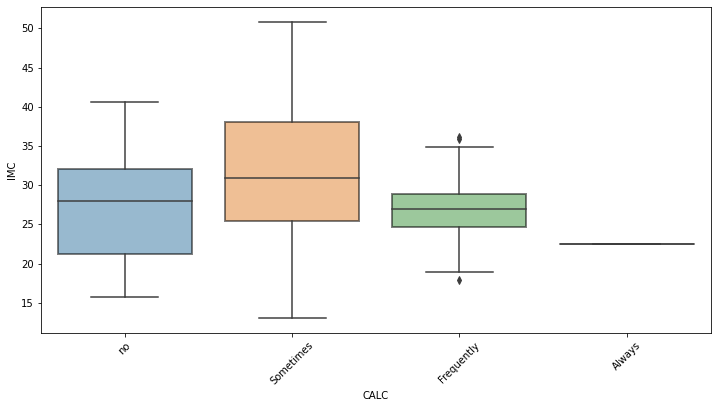

In [29]:
#Alcool
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='CALC', y='IMC', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

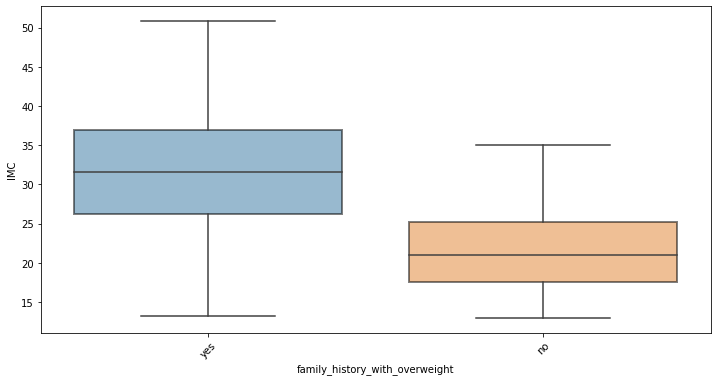

In [27]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='family_history_with_overweight', y='IMC', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

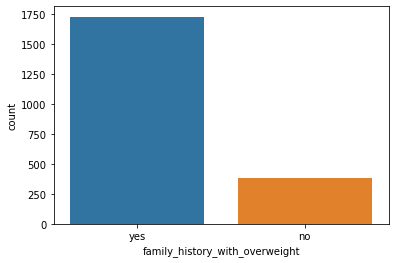

In [20]:
sns.countplot(df["family_history_with_overweight"])

###### Let's take a look on correlation :

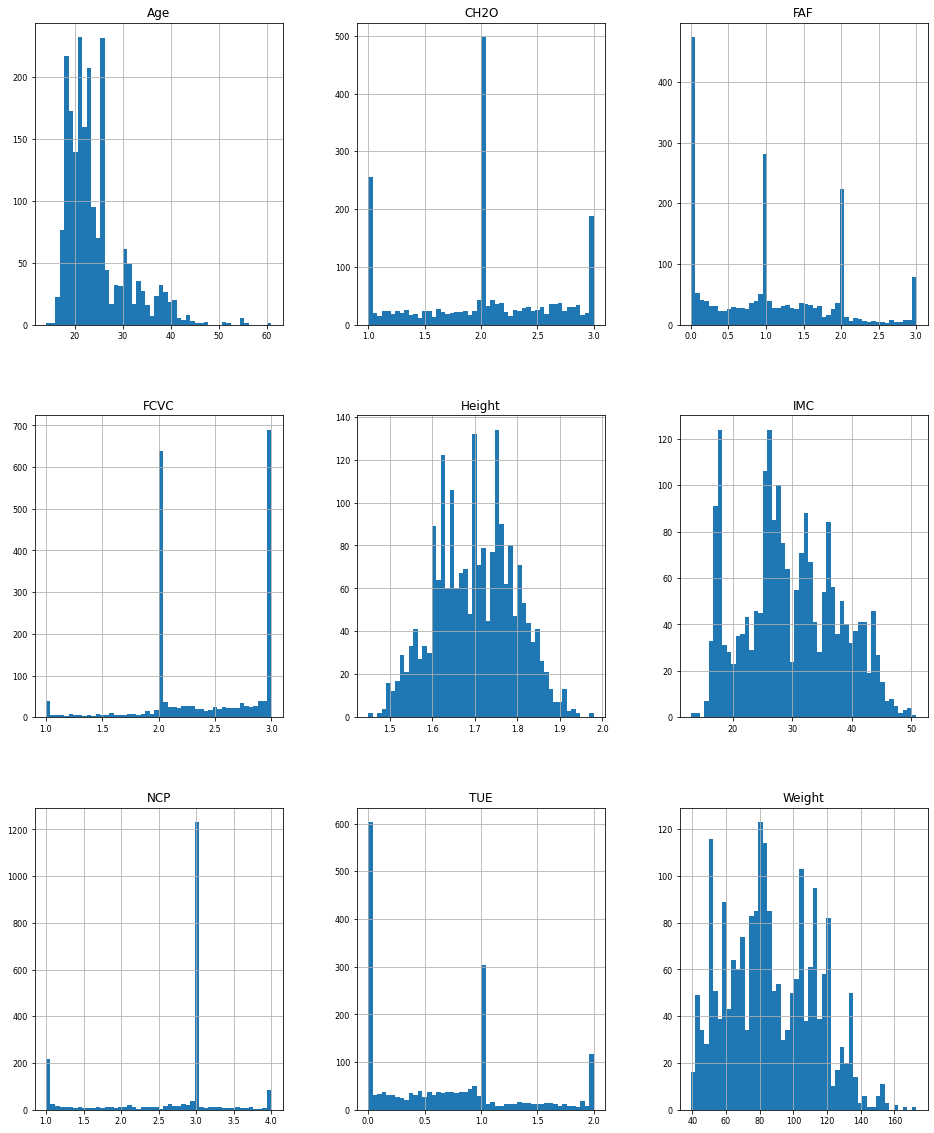

In [22]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

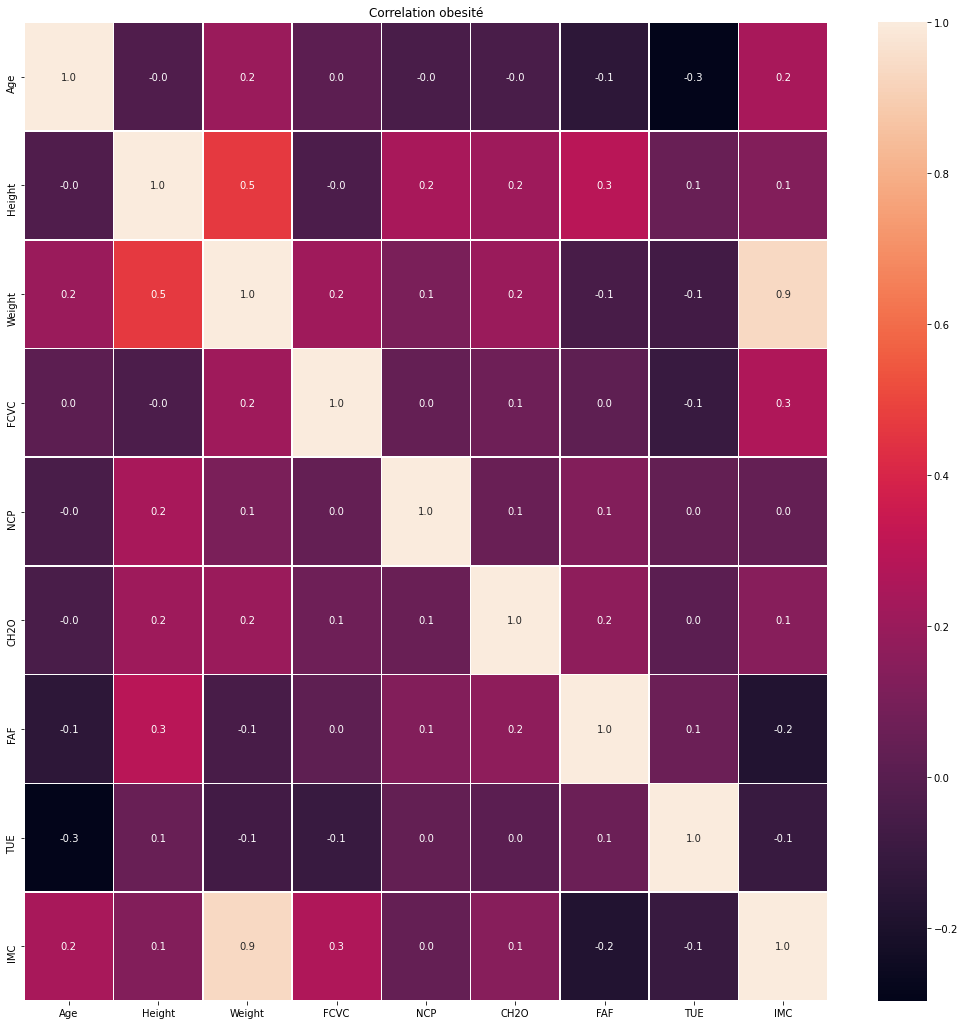

In [23]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax).set(title="Correlation obesité")
plt.show()

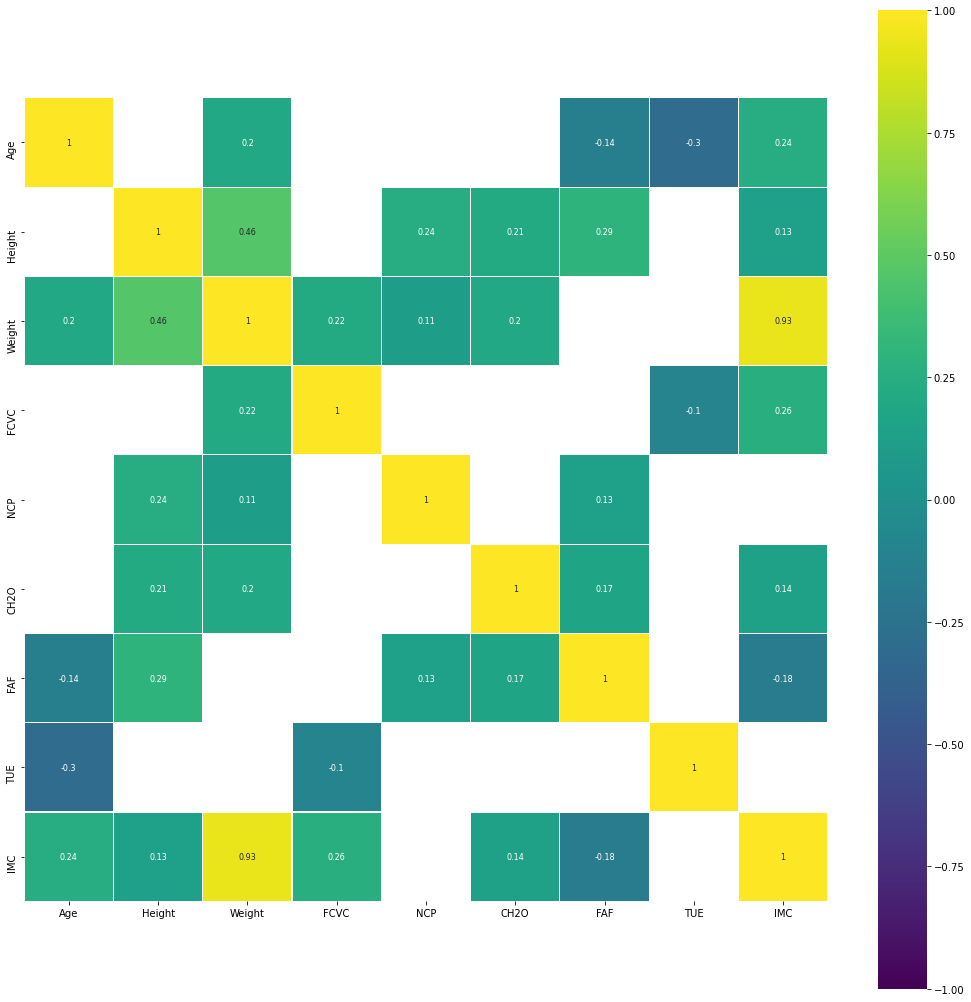

In [24]:
corr= df.corr()
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(corr[(corr >= 0.1) | (corr <= -0.1)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, ax=ax,annot_kws={"size": 8}, square=True);

### 4.Preprocessing Data

In [ ]:
# Jsp si tu t'y connais ici ? Jsp trop quoi faire encore j'ai commencé à regarder mais sans grand succès

### 5. Machine Learning Models

In [ ]:
# Ici tente des trucs si tu le sens faut faire des modèles, en créant un training et test data 
# et choper la meilleure précisision un peu comme au hackaton j'ai l'impréssion